In [1]:
import numpy as np
import pandas as pd
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.utils.plotting import plot_series

In [2]:
file_path = 'Closing_Price of Globalins.csv'

In [3]:
df = pd.read_csv(file_path)

In [4]:
closing_prices = df['Close']

In [5]:
df

,Date,Close
0,2023-05-28,40.4
1,2023-05-29,39.5
2,2023-02-12,31.5
3,2023-02-09,31.8
4,2023-02-07,32.4
...,...,...
597,2023-08-14,32.1
598,2023-08-24,0.0
599,2023-08-28,0.0
600,2023-08-29,32.4


In [6]:
# Function to perform Double Exponential Smoothing
def double_exponential_smoothing(series, alpha, beta):
    n = len(series)
    forecast = np.zeros(n)
    
    # Initial values
    level = series[0]
    trend = series[1] - series[0]
    
    forecast[0] = series[0]
    forecast[1] = series[1]
    
    # Double Exponential Smoothing
    for t in range(2, n):
        forecast[t] = level + trend
        level = alpha * series[t] + (1 - alpha) * (level + trend)
        trend = beta * (level - forecast[t-1]) + (1 - beta) * trend
    
    return forecast

In [7]:
alpha = 0.2
beta = 0.2

In [8]:
forecast = double_exponential_smoothing(closing_prices, alpha, beta)

In [15]:
forecast

array([40.4       , 39.5       , 39.5       , 36.86      , 34.2856    ,
       32.068256  , 30.30422656, 29.08610371, 28.44799221, 28.37213918,
       28.7986515 , 29.63702973, 30.77830506, 32.10671193, 33.58203676,
       34.96674666, 36.23656325, 37.02028413, 37.03698693, 36.56805834,
       35.60871365, 34.50616702, 33.00353448, 31.4850404 , 30.04270214,
       28.85972182, 28.00524062, 27.41505715, 27.19809847, 27.3360053 ,
       27.78496661, 28.48329679, 29.35923039, 30.33827618, 31.34961256,
       32.33116611, 33.2331778 , 33.9482134 , 34.44898623, 34.72971651,
       34.80315262, 34.69658675, 34.44734447, 34.09819341, 33.69305104,
       33.27328736, 32.87482289, 32.5261269 , 32.24713212, 32.04900593,
       31.98265946, 31.95231566, 31.98664163, 32.0725441 , 32.19489866,
       32.33808459, 32.487314  , 32.62968159, 32.75489584, 32.92768414,
       33.10261158, 33.15334171, 33.15968767, 33.12824327, 33.09157051,
       33.08543976, 33.14545474, 33.08823094, 33.44910448, 34.25

In [26]:
print("Min date:", df['Date'].min())
print("Max date:", df['Date'].max())

Min date: 2021-02-14 00:00:00
Max date: 2023-08-30 00:00:00


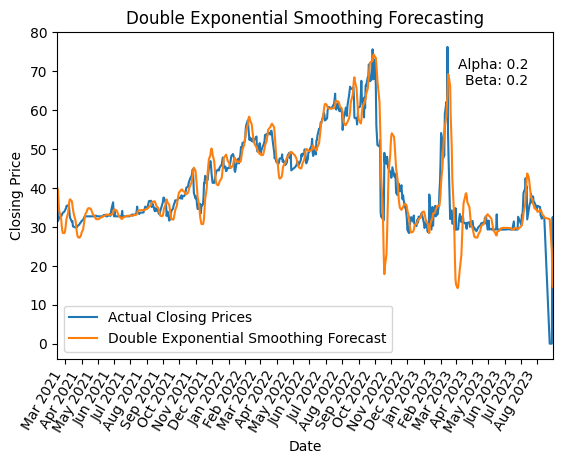

In [60]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
# df['Date']= df['Date'].sort_values()

plt.plot(df['Date'],closing_prices, label='Actual Closing Prices')
plt.plot(df['Date'],forecast, label='Double Exponential Smoothing Forecast')
plt.legend()
plt.title('Double Exponential Smoothing Forecasting')
plt.xlabel('Date')
plt.ylabel('Closing Price')


plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate(rotation=60)
plt.xlim(df['Date'].min(), df['Date'].max())

plt.text(0.95, 0.9, f'Alpha: {alpha}', transform=plt.gca().transAxes, ha='right', va='center')
plt.text(0.95, 0.85, f'Beta: {beta}', transform=plt.gca().transAxes, ha='right', va='center')
# plt.xlim(df['Date'].max())

plt.show()

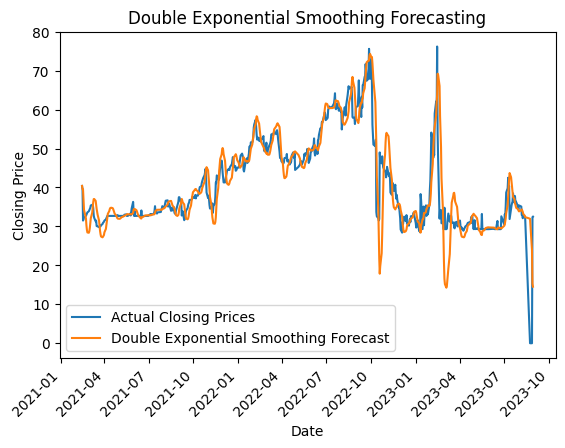

In [35]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
# df['Date']= df['Date'].sort_values()

plt.plot(df['Date'],closing_prices, label='Actual Closing Prices')
plt.plot(df['Date'],forecast, label='Double Exponential Smoothing Forecast')
plt.legend()
plt.title('Double Exponential Smoothing Forecasting')
plt.xlabel('Date')
plt.ylabel('Closing Price')


# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate(rotation=45)
# plt.xlim(pd.Timestamp('2023-05-28'), df['Date'].max())

plt.show()

In [ ]:
# df.set_index('Date', inplace=True)

In [ ]:
# y = df['Close']

In [ ]:
# def nested_to_2d_array(data):
#   array = []
#   for row in data:
#     array.append([item for item in row])
#   return array

In [ ]:
# y_sktime=nested_to_2d_array(y.values.reshape(1, -1))

In [ ]:
# y_sktime

In [ ]:
# df.head(10)

In [ ]:
# train_size = int(len(y) * 0.8)
# train, test = y.iloc[:train_size], y.iloc[train_size:]
# train_sktime, test_sktime = y_sktime.iloc[:, :train_size], y_sktime.iloc[:, train_size:]

In [ ]:
# # Create a double exponential smoothing model
# alpha = 0.2  # smoothing parameter for level
# beta = 0.2   # smoothing parameter for trend
# model = ExponentialSmoothing(trend='add', seasonal=None, sp=None, initialization_method="estimated", damping_trend=False, use_boxcox=False, remove_bias=False,
#                                initial_level=alpha, initial_trend=beta,
#                               initial_seasonal=None,random_state=None,)

In [ ]:
# model.fit(train)